<a href="https://colab.research.google.com/github/oladimeji-kazeem/currency-exchange-rate-predictor/blob/master/Exchange_rate_case_for_model_overestimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from fredapi import Fred
from getpass import getpass

In [6]:
# initialize FRED API
fred_api_key = getpass("Enter your FRED API key: ")
fred = Fred(api_key=fred_api_key)

Enter your FRED API key: ··········


In [7]:
# fetch data from FRED
eur_usd = fred.get_series('DEXUSEU')          # EUR/USD exchange rate
interest_rate = fred.get_series('FEDFUNDS')   # Federal funds rate
cpi = fred.get_series('CPIAUCSL')             # Consumer Price Index

In [9]:
# combine data into a DataFrame
df = pd.concat([eur_usd, interest_rate, cpi], axis=1)
df.columns = ['rate', 'interest_rate', 'cpi']
df.index = pd.to_datetime(df.index)
df.dropna(inplace=True)

In [10]:
# create lag features
for i in range(1, 4):
    df[f'rate_lag{i}'] = df['rate'].shift(i)

df.dropna(inplace=True)

In [11]:
# define features and target
features = ['rate_lag1', 'rate_lag2', 'rate_lag3', 'interest_rate', 'cpi']
X = df[features]
y = df['rate']

In [12]:
# scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False
)

In [14]:
# define and train the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)

In [15]:
# make predictions
y_pred = mlp.predict(X_test)

In [16]:
# evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.6f}")

Mean Squared Error: 0.381946


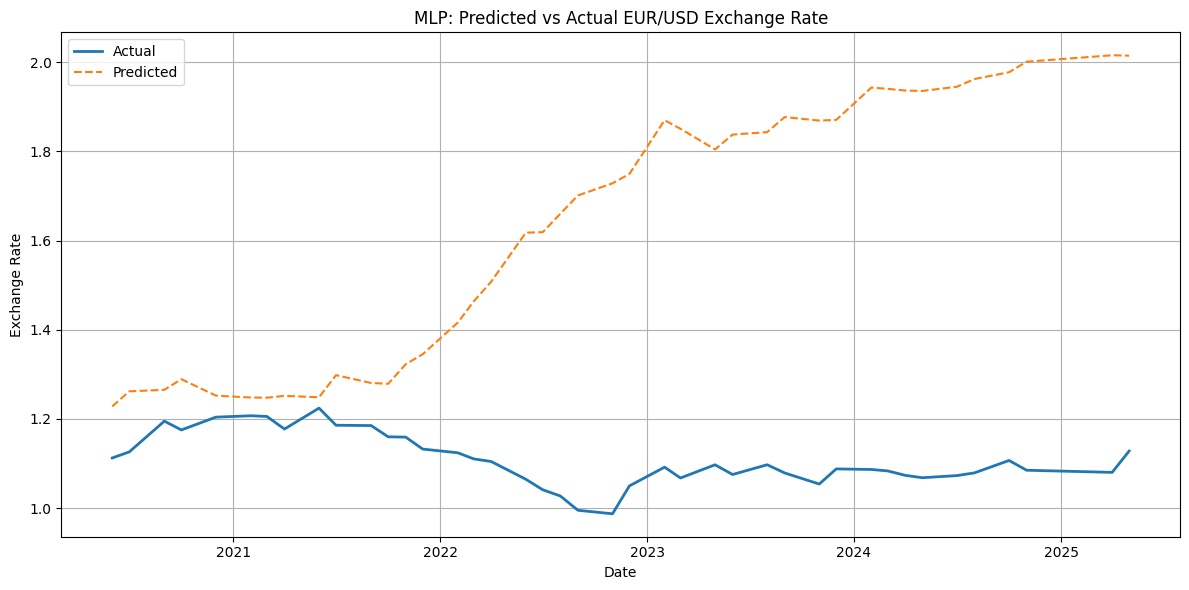

In [17]:
# visualize actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title('MLP: Predicted vs Actual EUR/USD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()